In [1]:
import pandas as pd
import numpy as np

In [2]:
board = pd.read_csv("../data/financials/board/board_base_0_7000.csv")

In [3]:
board.head()

,name,id,number_of_board_members,avg_age_of_board,total_active_assignments,total_prev_assignments
0,A Bergman Rör AB,5567988125,NaN,NaN,NaN,NaN
1,A Brash AB,5568391519,2.0,39.0,3.0,1.0
2,A Bygg och Montage i Piteå AB,5568871411,2.0,47.0,NaN,NaN
3,A Byggare i Väst AB,5569369977,2.0,45.0,NaN,NaN
4,Bravida Örnsköldsvik El AB,5564160371,NaN,NaN,NaN,NaN


In [4]:
board[~board['total_active_assignments'].isna()].shape

(1764, 6)

In [5]:
board[board['total_active_assignments']==26]

,name,id,number_of_board_members,avg_age_of_board,total_active_assignments,total_prev_assignments
390,Active Works AB,5566764535,2.0,53.0,26.0,66.0


In [6]:
board[board['id']=='5566764535']

,name,id,number_of_board_members,avg_age_of_board,total_active_assignments,total_prev_assignments
390,Active Works AB,5566764535,2.0,53.0,26.0,66.0


In [59]:
board_0_1000 = pd.read_csv("../data/financials/board/board_base_0_1000.csv")

In [60]:
board_1000_2000 = pd.read_csv("../data/financials/board/board_base_1000_2000.csv")

In [61]:
board_2000_6000 = pd.read_csv("../data/financials/board/board_base_2000_6000.csv")

In [62]:
board_6000_7000 = pd.read_csv("../data/financials/board/board_base_6000_7000.csv")

In [63]:
test = board_0_1000.append(board_1000_2000, ignore_index=True)
test = test.append(board_2000_6000, ignore_index=True)
test = test.append(board_6000_7000, ignore_index=True)

In [65]:
test.head()

,company,id,number_of_board_memebers,average_age_board,executives,total_active_assignments,total_prev_assignments,companies
0,A Brash AB,5568391519,2.0,39.0,Brash; Andrew William,3,1,John G Construction AB|A Brash Stockholm AB|A ...
1,A C Ställningsmontage Aktiebolag,5563594406,2.0,49.0,Herranen; Peter Mikael,3,1,Nisses Gatukök AB|Norrlands Kustmontage AB|A C...
2,A Dahlqvist Bygg & Betong AB,5590030499,6.0,54.0,Holmgren; Erik Bertil,6,1,Bertil Holmgren Bygg Aktiebolag|A Dahlqvist By...
3,A Hedlunds Måleriaktiebolag,5563014082,2.0,52.0,Hedlund; Axel Joakim,9,7,Hedlunds Måleri i Göteborg Aktiebolag|A Hedlun...
4,A Måleri & Golv i Uppland AB,5562074129,3.0,52.0,Norling; Hans Fredric,1,4,A Måleri & Golv i Uppland AB


In [66]:
board_0_1000.shape[0]+board_1000_2000.shape[0]+board_2000_6000.shape[0]+board_6000_7000.shape[0]

1859

In [67]:
test.shape

(1859, 8)

In [68]:
test['company'].nunique()

1747

## Testing how many of the active assignment companies are inactive

In [69]:
company_names = []
for companies in test['companies']:
    if type(companies)==float:
        continue
    companies_list = companies.split('|')
    company_names += companies_list

In [70]:
len(company_names)

7618

In [71]:
data = pd.read_csv("../data/financials/financials_status_forms_clean2.csv")

In [72]:
all_companies = data['company'].unique()

In [73]:
x = data[data['company'].isin(company_names)]

In [74]:
x['company'].nunique()

2474

In [75]:
x[x['default']==1].shape

(47, 48)

In [76]:
x[x['default']==1]['company'].nunique()

47

## Testing to see why certain companies in the active companies are not in the dataset (looks like it is because of different industries)

In [33]:
def h():
    comp_names = []
    for companies in test['companies']:
        if type(companies)==float:
            continue
        companies_list = companies.split('|')
        for comp in companies_list:
            if comp not in data['company'].unique():
                comp_names.append(comp)
                if len(comp_names) > 10:
                    return comp_names
                

In [34]:
h()

['A Brash Stockholm AB',
 'Nisses Gatukök AB',
 'Volgsjö Fastigheter Aktiebolag',
 'EPDH Fastigheter AB',
 'Vagnede Förvaltning AB',
 'Zeti Fastigheter AB',
 'Måleriföretagen i Väst Serviceaktiebolag',
 'NYMÅLIA Fastighets AB',
 'Nymålia Spinnaren AB',
 'Nymålia Paradisvägen AB',
 'BAH Fastigheter AB']

## Calculating the per company per executive per company proportion of inactive companies in their active assignments

In [142]:
def split_bar(a):
    return a.split("|")

In [148]:
props = []
for Id in test['id'].unique():
    company = test[test['id']==Id]
    active_assignments = company['companies']
    assignment_list = []
    for assignment in active_assignments:
        if type(assignment)==float:
            continue
        assignment_list += assignment.split("|")
    num_active_assignments = len(assignment_list)
    # in that companies active assignments get the companies that have defaulted
    fin_comps = data[data['company'].isin(assignment_list)]
    defaults = fin_comps[fin_comps['default']==1].shape[0]
    props.append(defaults/num_active_assignments)

In [149]:
import matplotlib.pyplot as plt

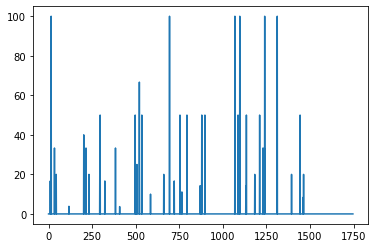

In [150]:
plt.plot(np.array(props)*100)

In [151]:
len(props)

1747

In [152]:
count=0
for p in props:
    if p != 0.0:
        count+=1
count

43

In [153]:
np.mean(np.array(props)*100)

0.9896388459639747